# Prepare simulations

In [1]:
import numpy as np
import matplotlib.pylab as plt
import os, sys

Text(0, 0.5, 'P/atm')

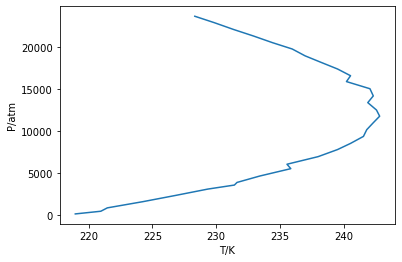

In [2]:
ice='IceII'
vega_line=np.loadtxt('IceII_liquid_tip4p_pd.dat')
vega_line[:,0]+=20 #Add 20K to adjust from tip4p to tip4p/ice
vega_line[:,1]+=vega_line[:,1]*0.986923 # to atm
vega_line=vega_line[np.argsort(vega_line[:,1])]
plt.plot(vega_line[:,0],vega_line[:,1]*10)
plt.xlabel('T/K')
plt.ylabel('P/atm')

### Pressure values for simulations

In [3]:

P_atm=[1000, 2000, 3000,4000] 
for p in P_atm:
    print(p)

1000
2000
3000
4000


### Make simulation folders

In [4]:
for i, patm in enumerate(P_atm):
    patm=P_atm[i]
    fold=ice+'_{}atm'.format(patm)
    os.system('cp -r {} {}'.format(ice,fold))
    cmd='sed -i "" "s#variable .* pressure .*#variable        pressure equal {}#g" {}/in.pressure'.format(patm,fold)
    os.system(cmd)
for i, patm in enumerate(P_atm):
    patm=P_atm[i]
    fold='Liquid_{}atm'.format(patm)
    os.system('cp -r Liquid {}'.format(fold))
    cmd='sed -i "" "s#variable .* pressure .*#variable        pressure equal {}#g" {}/in.pressure'.format(patm,fold)
    os.system(cmd)


In [6]:
!jupyter nbconvert --to script prep_sims.ipynb

[NbConvertApp] Converting notebook prep_sims.ipynb to script
[NbConvertApp] Writing 1252 bytes to prep_sims.py
